In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc
from datetime import datetime
from itertools import dropwhile, takewhile
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

In [15]:
!pip install instaloader==4.4.5
!pip install ekphrasis
!pip install tweet-preprocessor
nltk.download('averaged_perceptron_tagger')
!pip install wordcloud
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')

     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for instaloader: filename=instaloader-4.4.5-cp37-none-any.whl size=45661 sha256=6f281bdfc84db0cb54d8b16648e07e1262a87d374b4fc6cb71411ab499229fff
  Stored in directory: /root/.cache/pip/wheels/a9/da/a9/ad64e3e630496ce3c372d973481e66c86a18dae2a696063424
Successfully built instaloader
     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 184kB 16.0MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-cp37-none-any.whl size=82844 sha256=e838daa738cdf09c5a42e2df7b7f2399b727076f552f67b77509a9503304bec5
  Stored in directory: /root/.cache/pip/wheels/2f/c5/9b/c9b60f535a2cf9fdbc92d84c4801a010c35a9cd348011ed2a1
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=009b1651d767b76e15eba1405ca1939dd8d4be68a2ac2f0119fe5e338abf781b
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998

True

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from instaloader import Instaloader, Hashtag

# Get instance
L = Instaloader()
L.post_metadata_txt_pattern = ""
L.download_geotags = False
L.save_metadata = False
L.save_metadata_json = False
L.download_comments = False

L.login('xxx', 'xxx') #credentials
print("login complete")

login complete


In [20]:
#hashtag = Hashtag.from_name(L.context, 'healthyrecipes')

#SINCE = datetime(2020, 12, 9)
#UNTIL = datetime(2015, 12, 16)

#k = 0
#max = 50

#for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, hashtag.get_posts())):
#for post in hashtag.get_all_posts():
#  L.download_post(post, target="#"+hashtag.name) 
   
#  k +=1

#  if k >=max:
#    break

In [110]:
hashtag = Hashtag.from_name(L.context, 'recipe')

SINCE = datetime(2020, 1, 1)
UNTIL = datetime(2020, 12, 31)

likes = []
captions = []
comments = []

k = 0
max = 1000

for post in takewhile(lambda p: p.date > SINCE, dropwhile(lambda p: p.date < UNTIL, hashtag.get_all_posts())):
#for post in hashtag.get_all_posts():
  likes.append(post.likes)
  captions.append(post.caption)
  comments.append(post.comments)
    
  k +=1

  if k >=max:
    break

In [111]:
print(likes)
print(captions)
print(comments)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 19, 1, 1, 1, 8, 5, 2, 0, 5, 1, 3, 3, 8, 12, 3, 8, 8, 4, 1, 2, 0, 3, 3, 1, 4, 5, 0, 7, 8, 38, 2, 6, 3, 60, 2, 1, 5, 29, 3, 3, 4, 3, 7, 2, 5, 6, 4, 2, 0, 0, 5, 9, 16, 1, 196, 2, 13, 1548, 426, 12756, 6933, 1168, 9609, 3784, 28383, 19568, 7137, 0, 3, 3, 8, 2, 1, 24, 1, 1, 3, 2, 2, 107, 0, 5, 9, 3, 0, 0, 5, 28, 0, 82, 4, 0, 11, 0, 9, 2, 1, 1, 1, 3, 1, 0, 6, 1, 16, 4, 3, 5, 8, 75, 2, 3, 18, 9, 2, 2, 2, 8, 2, 5, 1, 0, 17, 11, 0, 2, 9, 0, 1, 0, 57, 0, 16, 12, 6, 121, 11, 16, 886, 8, 1, 3, 2, 0, 10, 8, 0, 2, 0, 3, 4, 27, 14, 2, 12, 51, 3, 4, 4, 14, 23, 1, 10, 0, 33, 3, 28, 4, 13, 16, 8, 17, 9, 31, 17, 15, 2, 19, 2, 62, 6, 8, 18, 21, 3, 5, 1, 1, 2, 6, 10, 9, 1, 3, 10, 20, 25, 77, 71, 101, 2, 17, 1, 18, 89, 6, 14, 7, 5, 10, 10, 24, 2, 45, 2, 30, 24, 33, 2, 20, 1, 3, 18, 2, 21, 2, 1, 5, 3, 135, 14, 11, 20, 12, 1, 30, 22, 35, 3, 2, 1, 18, 0, 4, 0, 0, 3, 44, 0, 231, 0, 31, 3, 0, 6, 29, 10, 4, 5, 33, 80, 13, 16, 68, 1, 7, 13, 1, 1, 38, 23, 22, 7, 687, 55, 14, 11, 12

In [112]:
raw = pd.DataFrame(likes, columns=['likes'])
raw['comments'] = comments
raw['captions'] = captions

In [113]:
#from ekphrasis.classes.segmenter import Segmenter
#segmenter using the word statistics from Twitter
#seg_tw = Segmenter(corpus='twitter')
len(raw)

587

In [1]:
import preprocessor as p

#forming a separate feature for cleaned captions
clean = []
for i,v in enumerate(raw['captions']):
  tmp = p.clean(str(v))
  clean.append(tmp)
raw['clean'] = clean

NameError: name 'raw' is not defined

In [115]:
tokenizer = TweetTokenizer()

raw['clean'] = raw.clean.apply(lambda x: tokenizer.tokenize(x.lower()) )

In [116]:
punc = []
for i in raw.clean:
  nopunc = [''.join(c for c in s if c not in string.punctuation) for s in i]
  punc.append(nopunc)
raw['clean'] = punc

In [117]:
stop_words = stopwords.words('english')
stop_words.extend(['je', 'g', 'ho', 'e', 'di', 'que', 'con', 'para', 'everything', 'ingredients', 'link',
                   'gr', 'tsp', 'tbps', 'add', 'berry', 'tag', 'calorie', 'recipeingredients', 'il',
                   'agavedirections', 'morning', 'cup', 'blender', 'newsletter', 'minutes', 'dei',
                   'da', 'hack', 'poco', 'spolverata', 'edition', 'olio', 'tablespoon', 'yummy', 'le',
                   'beets', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', ']', '[', 'de', "]",
                   "'", 'recipe', 'recipes', 'la', ' ', 'tbsp', 'un', '12', 'en', 'im', 'et',
                   'chopped', 'need', 'look', 'use', 'enjoy', 'el', 'una', 'cook', 'time', 'food',
                   'day', 'dont', 'today', 'c', 'want', 'top', 'place', 'pau', 'n', 'sdt',
                   'air', 'masak', 'size', 'jagung', 'setelah', 'size', 'merah', 'putih', 'rata',
                   'someone', 'ml', 'manis', 'wont', 'ihr', 'sea', 'youre', 'time', 'pura', 'ang',
                   'ms', 'cincang', 'bahan', 'sdm', 'aduk', 'daun', 'cookie', 'pandan', 'lot', 'ku',
                   'las', 'es', 'por', 'post', 'think', 'les', 'los', 'way', 'een', 'avec',
                   'ly', 'worlds'])

In [118]:
def remove_stopwords(text):
  words = [w for w in text if w not in stop_words]
  return words

In [119]:
raw['clean'] = raw.clean.apply(lambda x: remove_stopwords(x))

In [120]:
top = raw.sort_values('likes', ascending=False)[:20]

In [121]:
raw.head()

,likes,comments,captions,clean
0,0,0,Holaa triskiifriskiiiiis!!!!! 👩🏼‍🍳👩🏼‍🍳👩🏼‍🍳\nOs...,"[holaa, triskiifriskiiiiis, , , , os, enseo, e..."
1,1,0,#Polpi alla Luciana a modo mio\n.\n.\n.\n.\n.\...,"[alla, luciana, modo, mio, ]"
2,0,0,Looking for a new recipe ? 😊 \nTry this creamy...,"[looking, new, , try, creamy, , smoothie, crem..."
3,1,0,Parce que votre bien-être est notre ultime pré...,"[parce, votre, bientre, est, notre, ultime, pr..."
4,0,0,Bublanina - A typed vintage recipe for Bublani...,"[bublanina, , typed, vintage, bublanina, , tra..."


In [122]:
def make_one_list(srs):
  combi = []
  for i in srs:
    combi.extend(i)
  return combi

In [123]:
nn_flat = make_one_list(raw.clean)
nn_noempties = [x for x in nn_flat if x]

In [124]:
top_flat = make_one_list(top.clean)
top_noempties = [x for x in top_flat if x]

In [125]:
is_noun = lambda pos: pos[:2] == 'NN'

nn = []
#get nouns
for i in top_noempties:
  tokenized = nltk.word_tokenize(str(i))
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  nn.append(nouns)

In [126]:
nn_flat = make_one_list(nn)

In [127]:
from wordcloud import WordCloud
#Frequency of words
fdist = FreqDist(nn_flat)

In [128]:
fdist.most_common(20)

[('oil', 12),
 ('sugar', 11),
 ('pepper', 11),
 ('sweet', 10),
 ('cake', 10),
 ('garlic', 10),
 ('salt', 9),
 ('cheese', 9),
 ('mayonnaise', 7),
 ('na', 7),
 ('bell', 6),
 ('carrot', 6),
 ('bowl', 6),
 ('milka', 6),
 ('potatoes', 6),
 ('peri', 6),
 ('teaspoon', 6),
 ('brown', 5),
 ('bio', 5),
 ('chocolate', 5)]

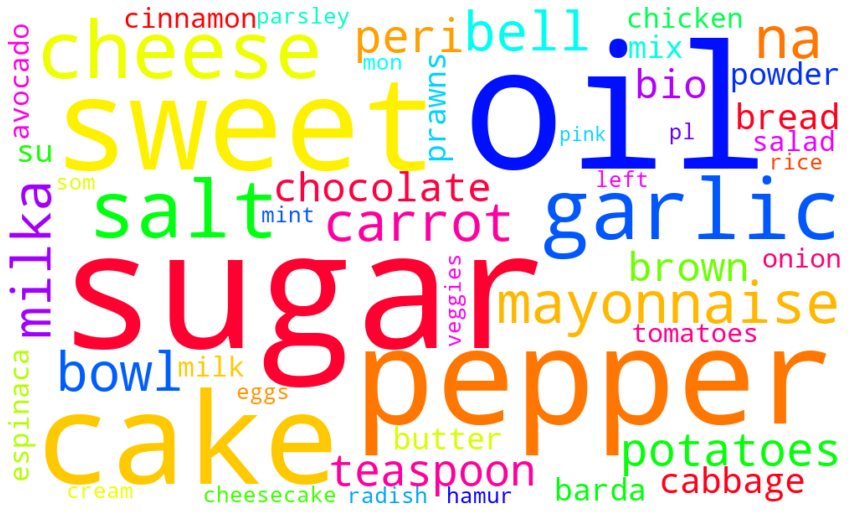

In [129]:
#WordCloud
wc = WordCloud(collocations=True, width=1000, height=600, background_color ='white', colormap="hsv", max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()_